# Introduction


Using a data set to practice analyzing and cleaning a wine data set.

There are missing values for some of the data that may need to be fixed or filled in.

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

url = 'https://raw.githubusercontent.com/AbulHasan03/CS381_DataScience/main/wine_data.csv'
df = pd.read_csv(url)
#check that data is properly being read
df.head()

#summary of the data set
df.info()
#missing values?
df.isnull().sum()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12795 entries, 0 to 12794
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   INDEX               12795 non-null  int64  
 1   TARGET              12795 non-null  int64  
 2   FixedAcidity        12795 non-null  float64
 3   VolatileAcidity     12795 non-null  float64
 4   CitricAcid          12795 non-null  float64
 5   ResidualSugar       12179 non-null  float64
 6   Chlorides           12157 non-null  float64
 7   FreeSulfurDioxide   12148 non-null  float64
 8   TotalSulfurDioxide  12113 non-null  float64
 9   Density             12795 non-null  float64
 10  pH                  12400 non-null  float64
 11  Sulphates           11585 non-null  float64
 12  Alcohol             12142 non-null  float64
 13  LabelAppeal         12795 non-null  int64  
 14  AcidIndex           12795 non-null  int64  
 15  STARS               9436 non-null   float64
dtypes: f

,INDEX,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
count,12795.000000,12795.000000,12795.000000,12795.000000,12795.000000,12179.000000,12157.000000,12148.000000,12113.000000,12795.000000,12400.000000,11585.000000,12142.000000,12795.000000,12795.000000,9436.000000
mean,8069.980305,3.029074,7.075717,0.324104,0.308413,5.418733,0.054822,30.845571,120.714233,0.994203,3.207628,0.527112,10.489236,-0.009066,7.772724,2.041755
std,4656.905107,1.926368,6.317643,0.784014,0.862080,33.749379,0.318467,148.714558,231.913211,0.026538,0.679687,0.932129,3.727819,0.891089,1.323926,0.902540
min,1.000000,0.000000,-18.100000,-2.790000,-3.240000,-127.800000,-1.171000,-555.000000,-823.000000,0.888090,0.480000,-3.130000,-4.700000,-2.000000,4.000000,1.000000
25%,4037.500000,2.000000,5.200000,0.130000,0.030000,-2.000000,-0.031000,0.000000,27.000000,0.987720,2.960000,0.280000,9.000000,-1.000000,7.000000,1.000000
50%,8110.000000,3.000000,6.900000,0.280000,0.310000,3.900000,0.046000,30.000000,123.000000,0.994490,3.200000,0.500000,10.400000,0.000000,8.000000,2.000000
75%,12106.500000,4.000000,9.500000,0.640000,0.580000,15.900000,0.153000,70.000000,208.000000,1.000515,3.470000,0.860000,12.400000,1.000000,8.000000,3.000000
max,16129.000000,8.000000,34.400000,3.680000,3.860000,141.150000,1.351000,623.000000,1057.000000,1.099240,6.130000,4.240000,26.500000,2.000000,17.000000,4.000000


# Exploratory Data Analysis (Raw Data)
Look through the data set to find data that may have an outlier or to find trends in the data.

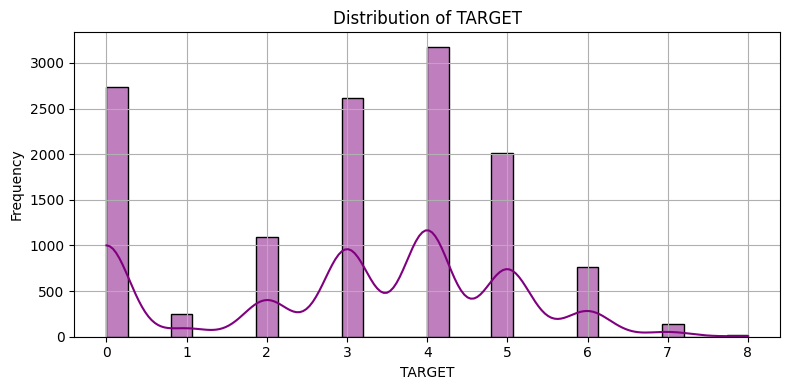

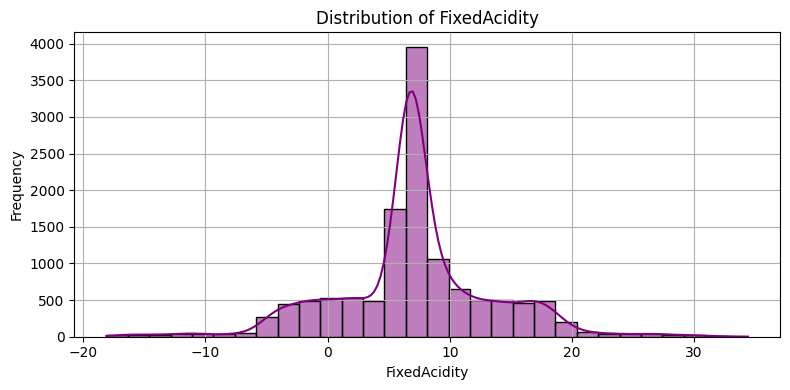

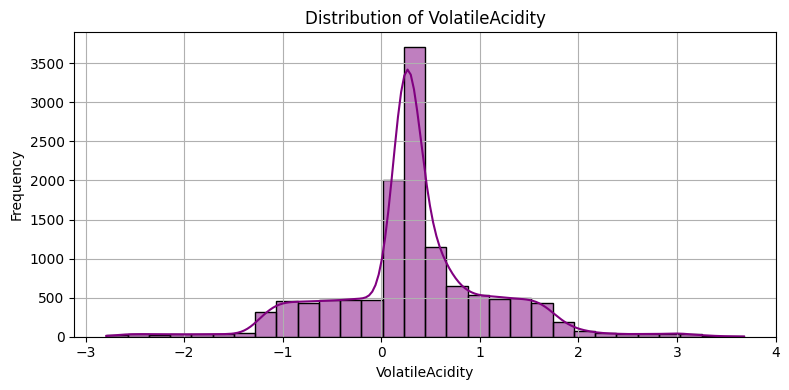

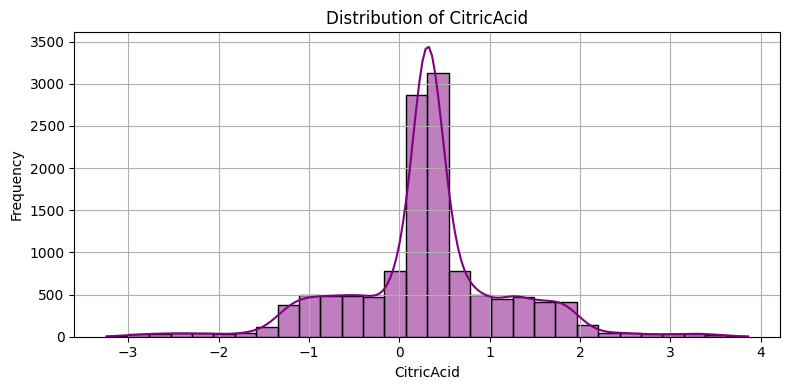

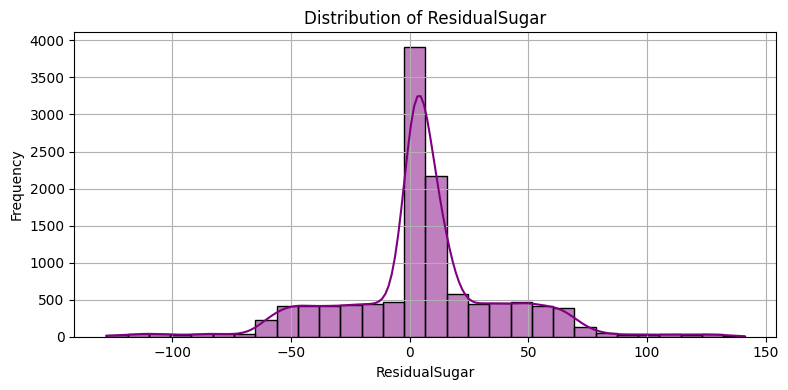

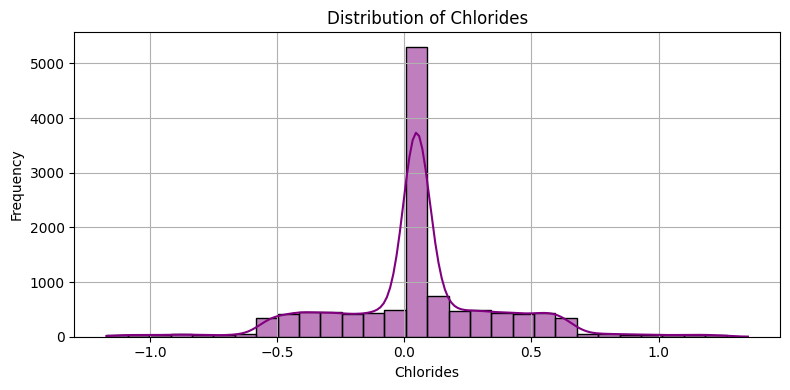

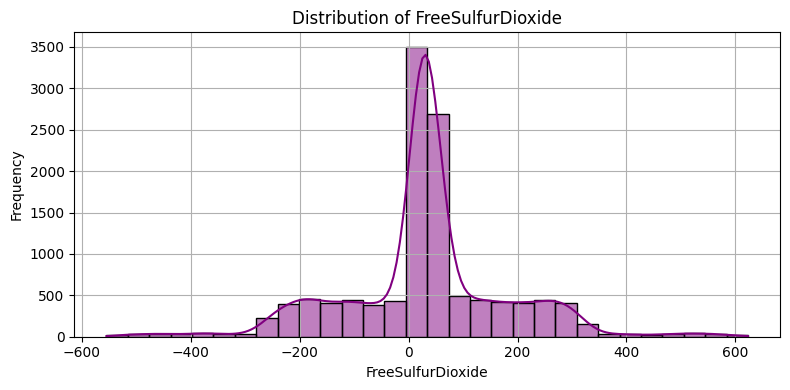

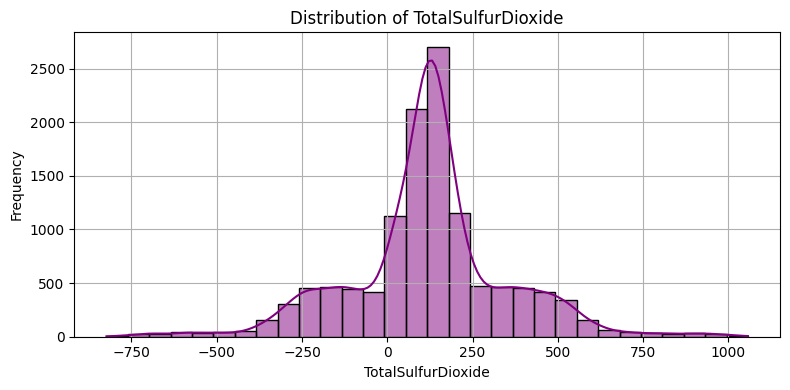

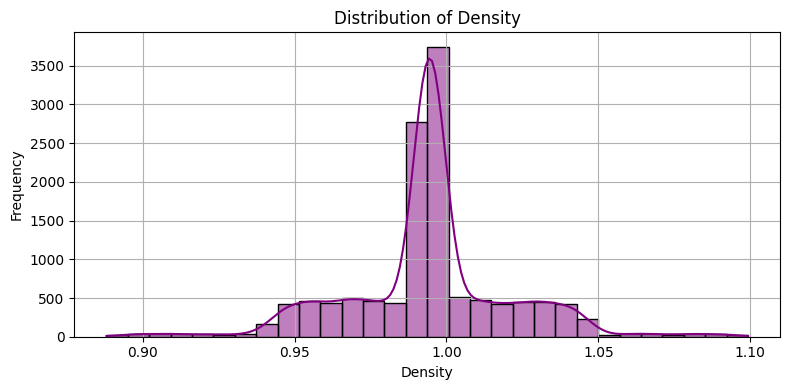

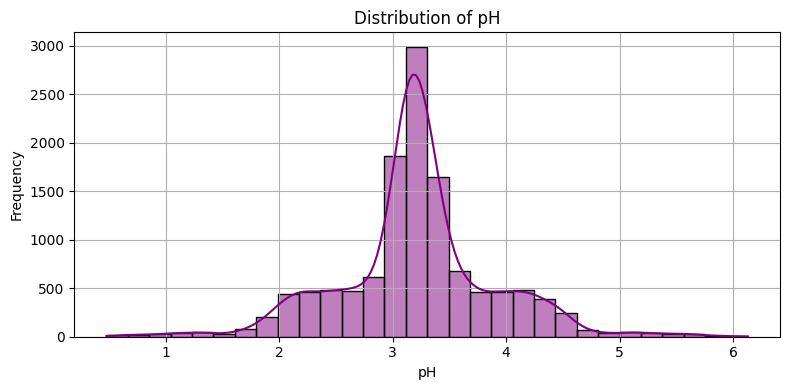

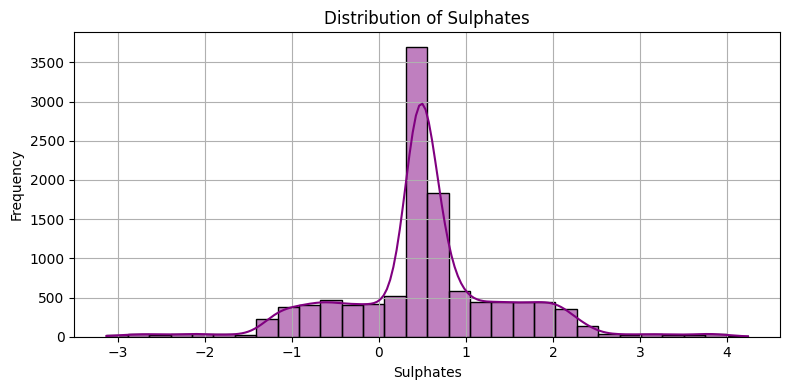

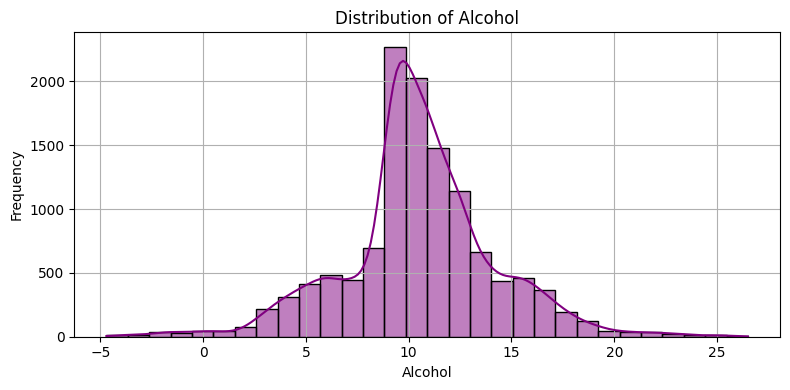

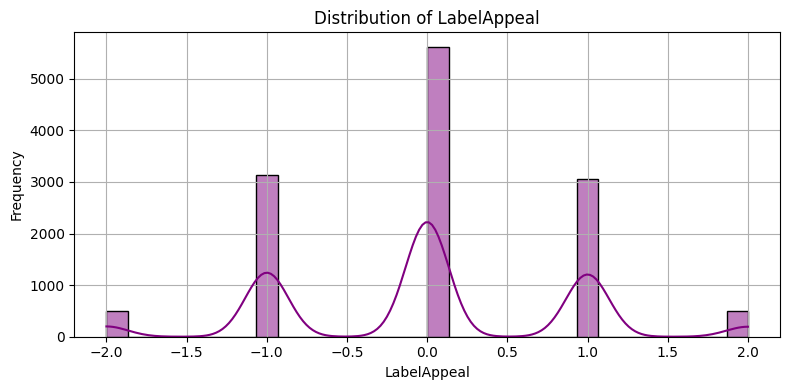

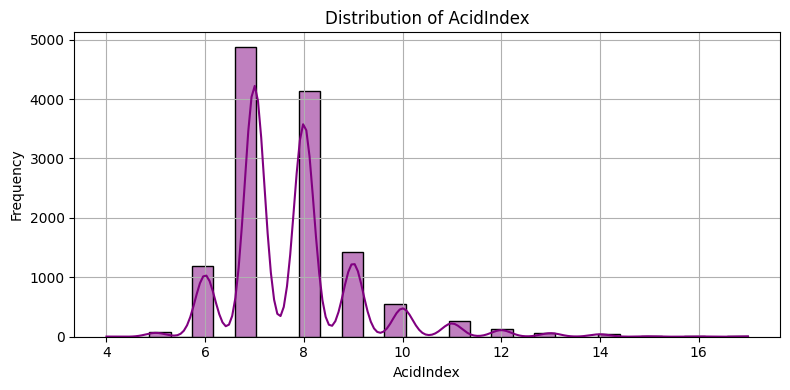

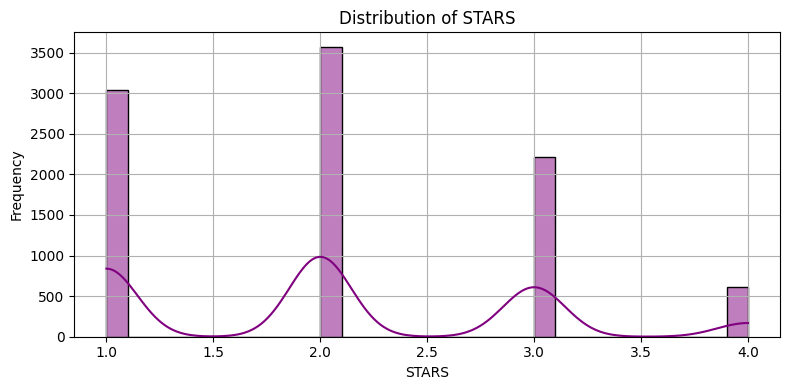

In [62]:
# Histograms of data
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.drop("INDEX", errors='ignore')

for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30, color='purple')
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.title(f"Distribution of {col}")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

Check the dataset for extreme values that may be outliers

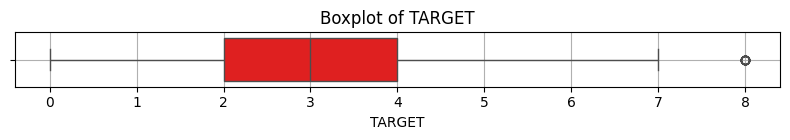

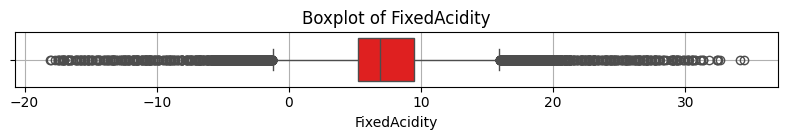

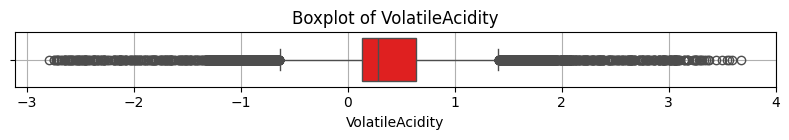

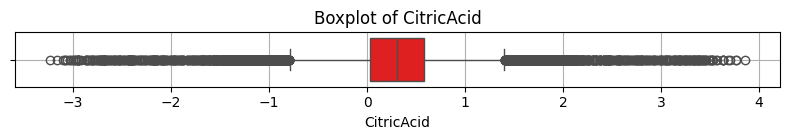

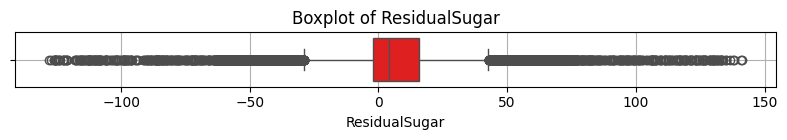

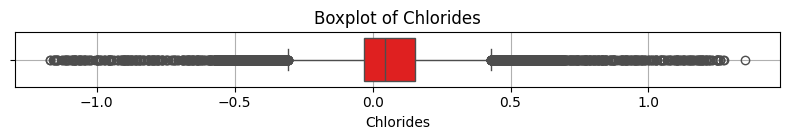

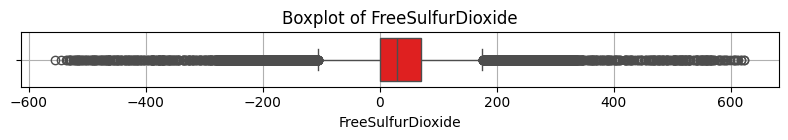

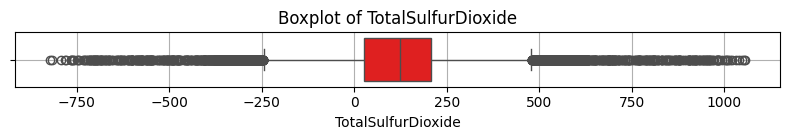

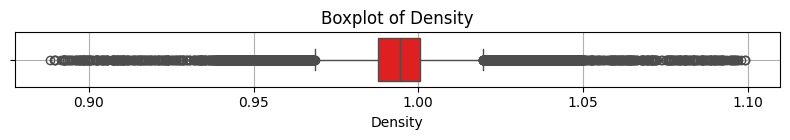

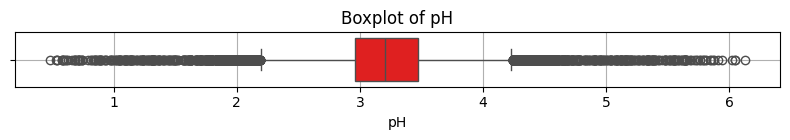

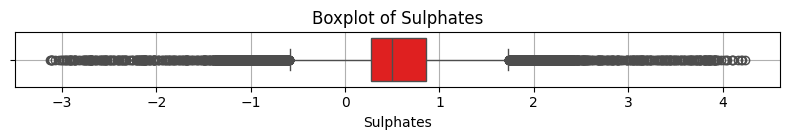

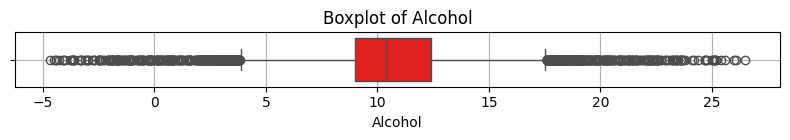

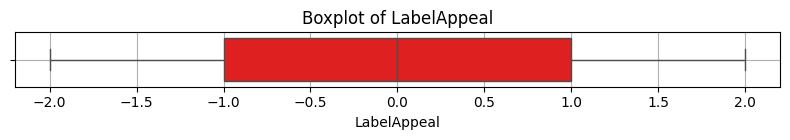

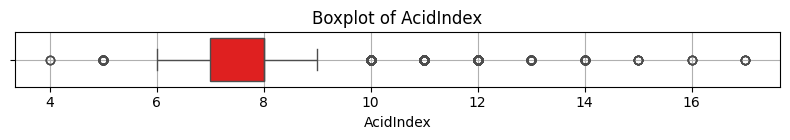

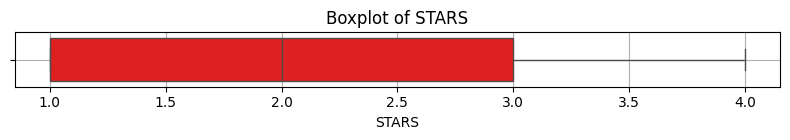

In [63]:
#boxplot to find outliers in the data
for col in numeric_cols:
    plt.figure(figsize=(8, 1.5))
    sns.boxplot(x=df[col], color='red')
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

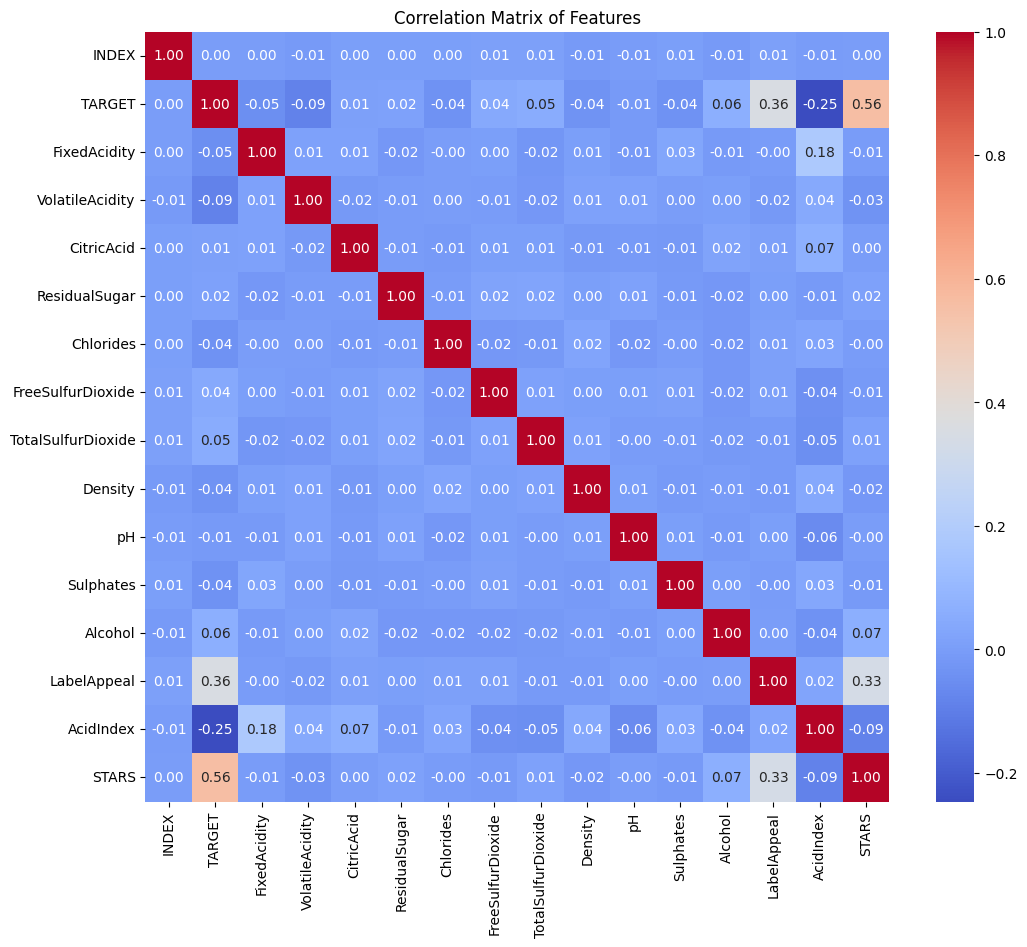

In [64]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix of Features")
plt.show()

Some errors in the data have been found.



1.   Missing data for STARS
2.   Some distributions are right-skewed such as target, residual sugar, etc.
3. Chemical attributes seem to have some outliers.
4. Data needs to be imputed using ML model



# Data Preparation

In [65]:
# STARS rating system goes from 0 to 5, ensure this is the case in the data
df['STARS'] = df['STARS'].clip(0, 5)

# these columns had nulls
columns_with_nulls = [
    'ResidualSugar', 'Chlorides', 'FreeSulfurDioxide',
    'TotalSulfurDioxide', 'pH', 'Sulphates', 'Alcohol'
]

# fills in missing values with the median
for col in columns_with_nulls:
    median_val = df[col].median()
    df[col] = df[col].fillna(median_val)
    print(f"{col}: filled with {col} median value {median_val}")

ResidualSugar: filled with ResidualSugar median value 3.9
Chlorides: filled with Chlorides median value 0.046
FreeSulfurDioxide: filled with FreeSulfurDioxide median value 30.0
TotalSulfurDioxide: filled with TotalSulfurDioxide median value 123.0
pH: filled with pH median value 3.2
Sulphates: filled with Sulphates median value 0.5
Alcohol: filled with Alcohol median value 10.4


In [66]:
# Minimize outliers by setting a maximum cap on the data using IQR
def cap_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return series.clip(lower_bound, upper_bound)

# Apply to the numeric columns
cols_to_cap = [col for col in numeric_cols if col not in ['TARGET', 'INDEX']]
for col in cols_to_cap:
    df[col] = cap_outliers(df[col])

df['log_TARGET'] = np.log1p(df['TARGET'])


Used a log target algorithm to normalize some distributions as the data would be heavily skewed one way by outliers allowing for the data to be more centralized.

# Exploratory Data Analysis (Adjusted)
Cleaned the data and analyze it again with less missing values by imputing with median values and removing outliers using the IQR. This allows the data to be more normalized without being skewed as much by incomplete data or from heavy outliers.

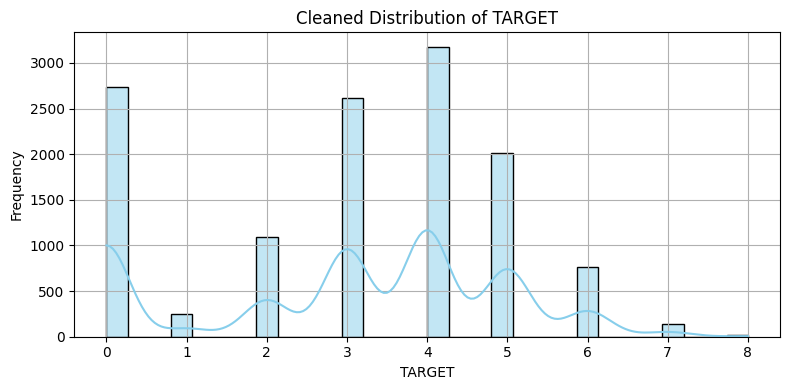

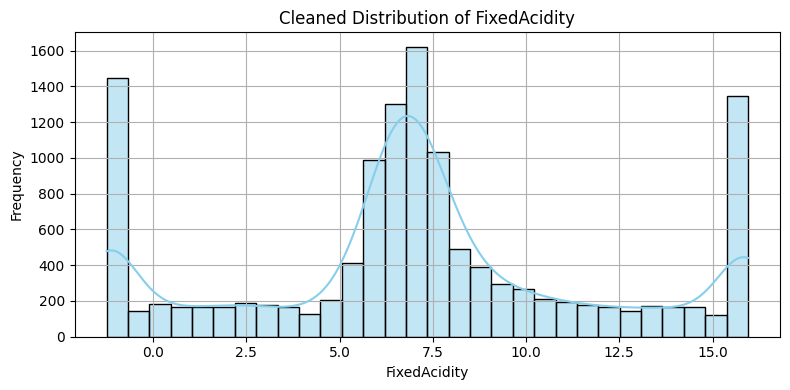

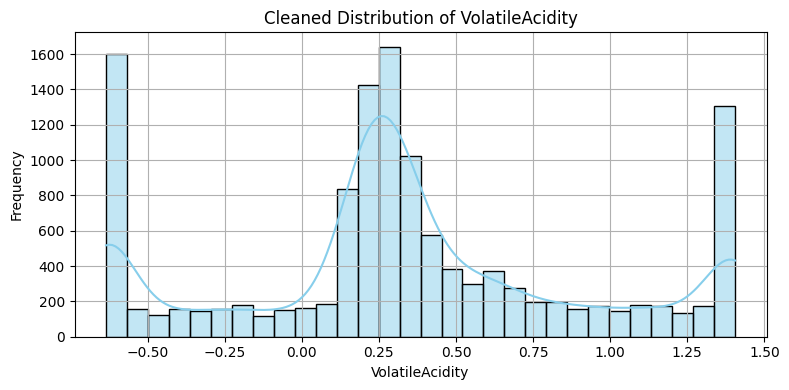

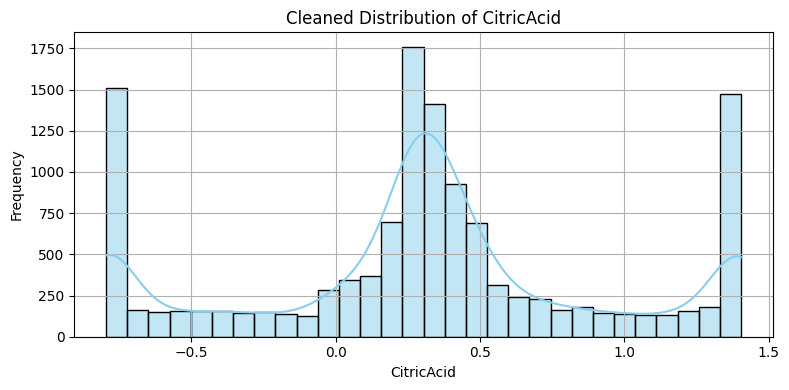

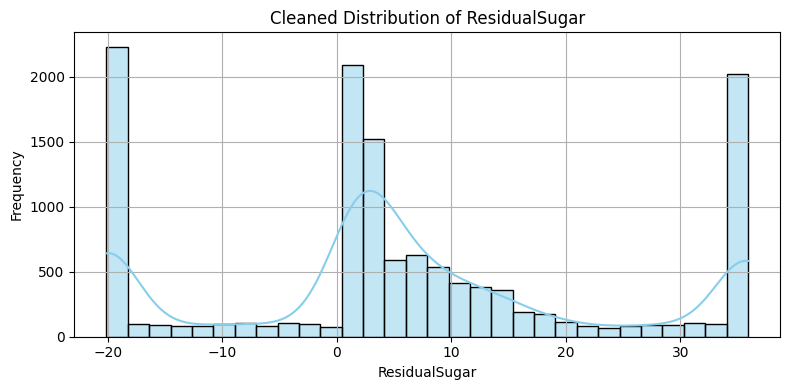

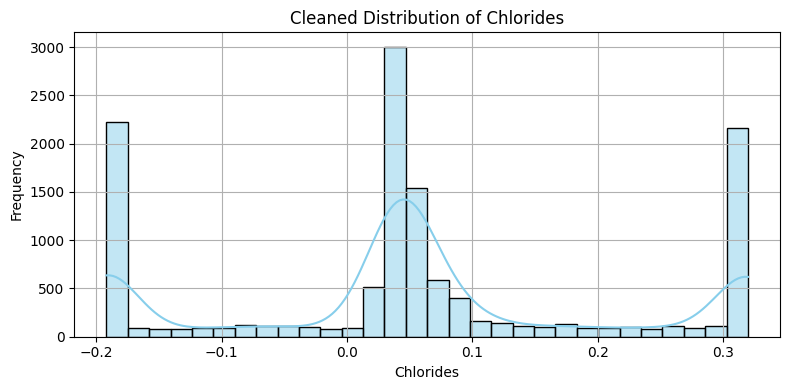

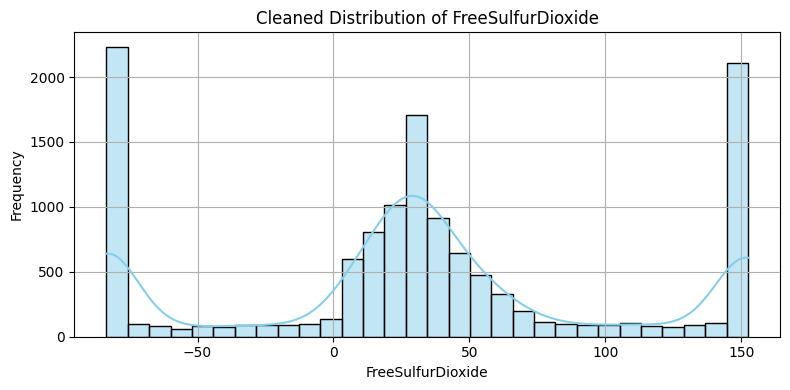

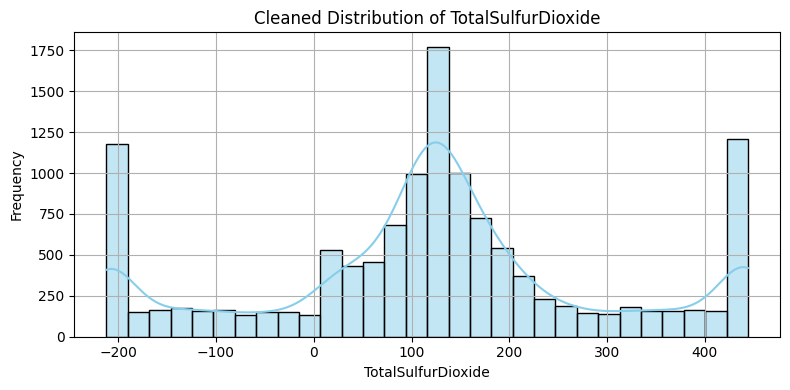

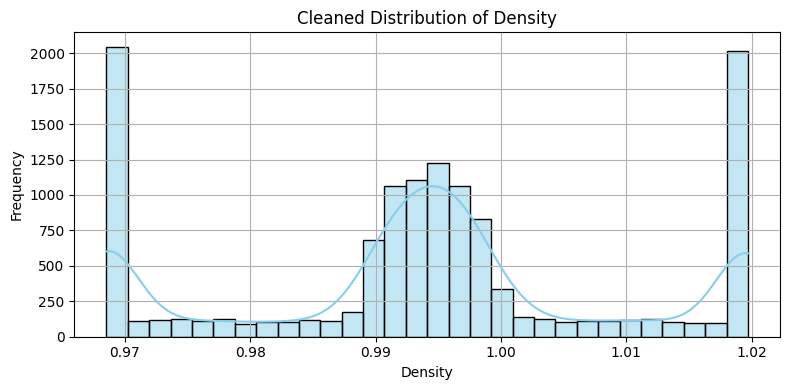

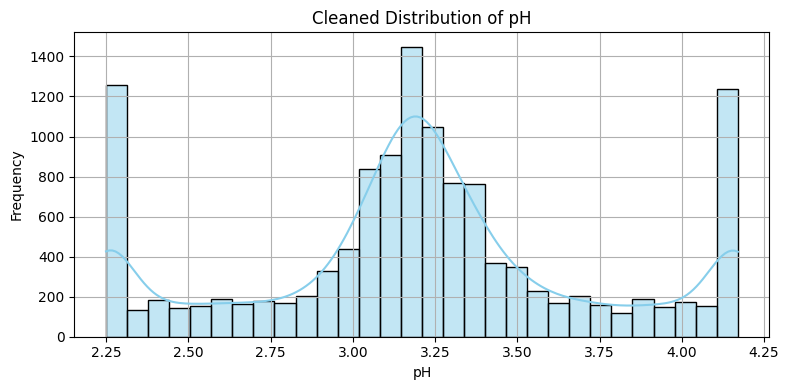

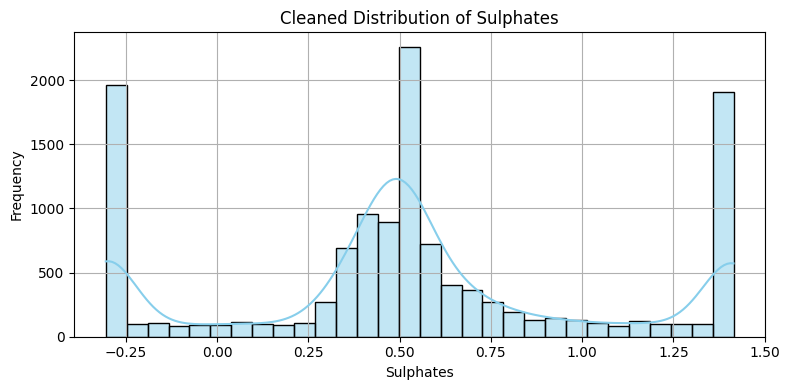

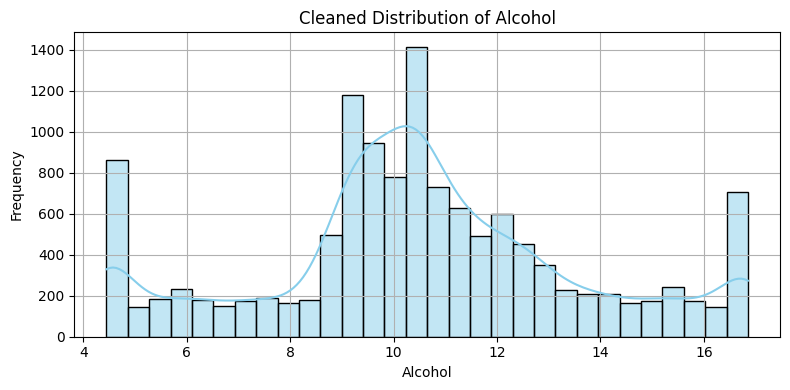

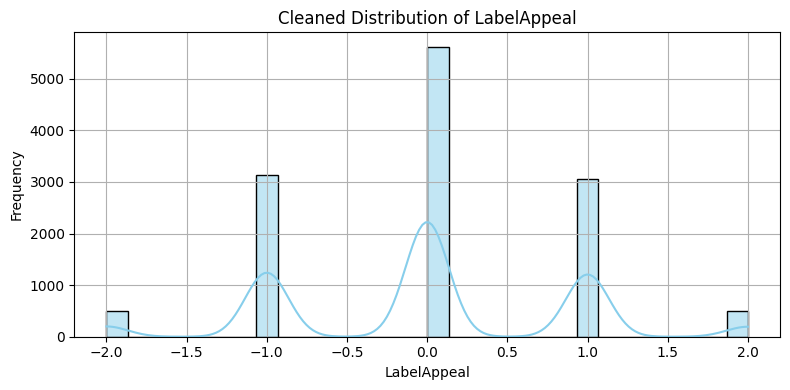

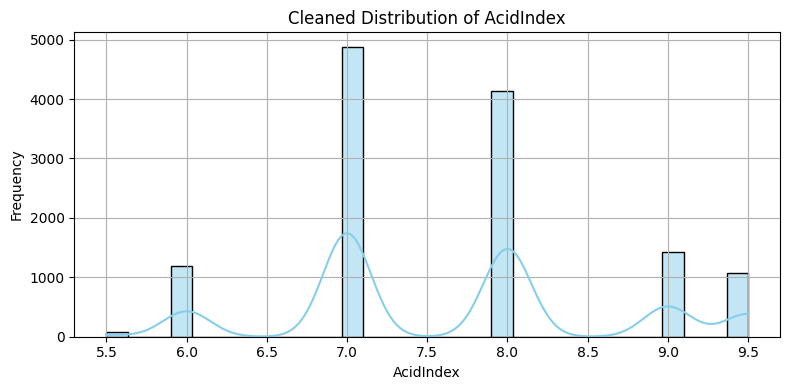

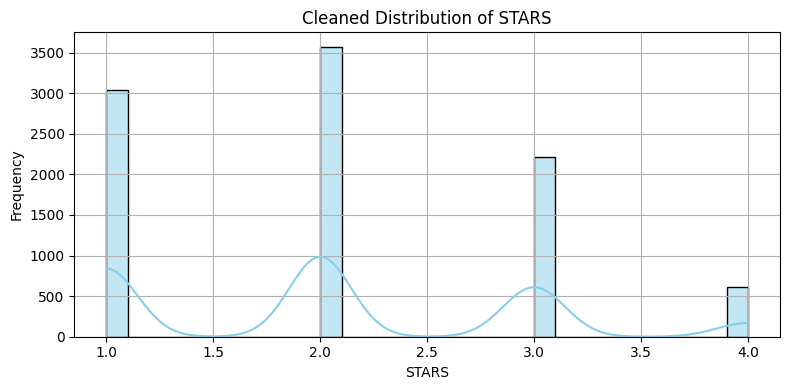

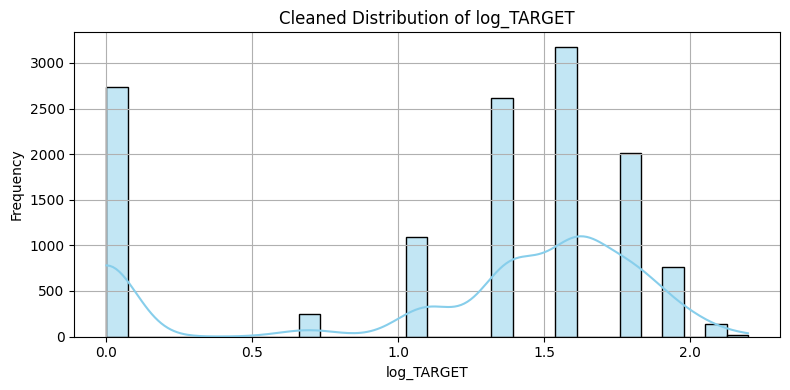

In [67]:
# Histograms on Cleaned Data
clean_numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.drop(["INDEX"], errors='ignore')

for col in clean_numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.title(f"Cleaned Distribution of {col}")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


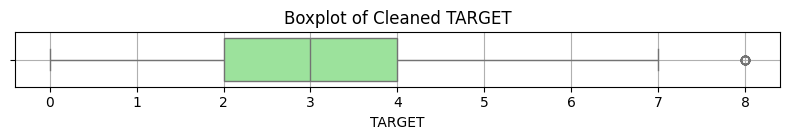

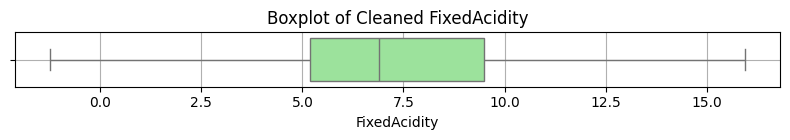

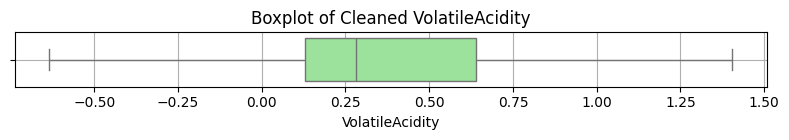

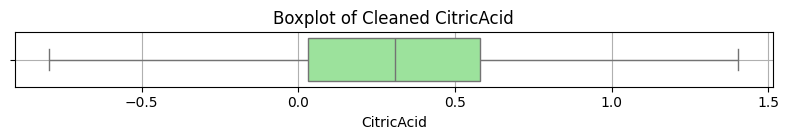

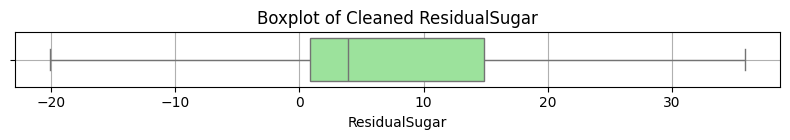

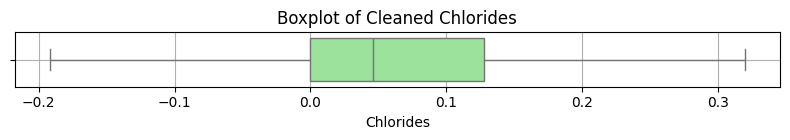

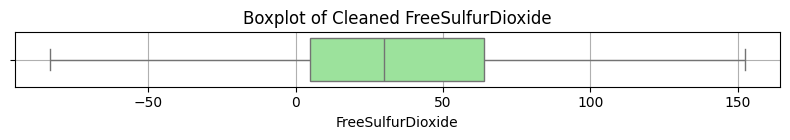

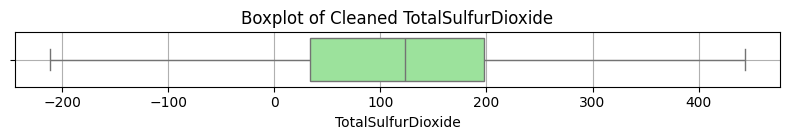

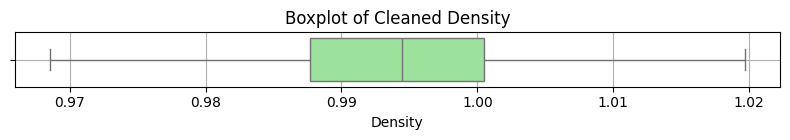

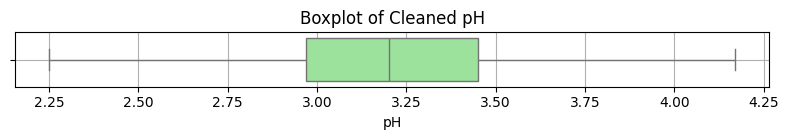

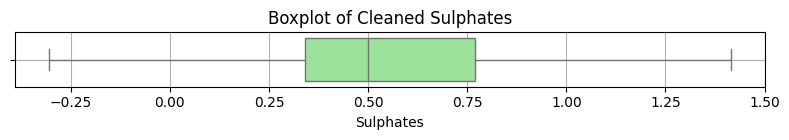

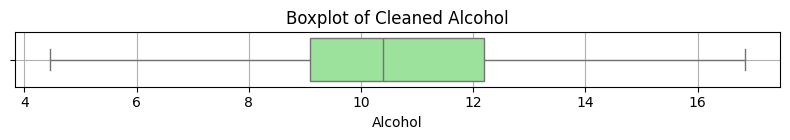

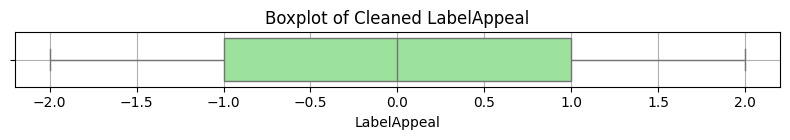

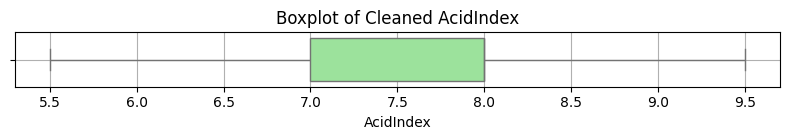

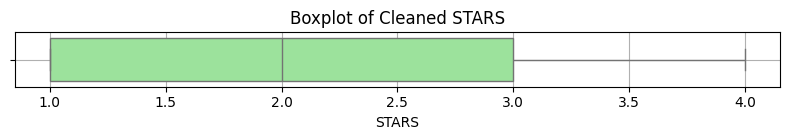

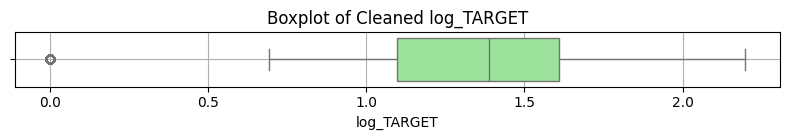

In [68]:
#Boxplots on cleaned data
for col in clean_numeric_cols:
    plt.figure(figsize=(8, 1.5))
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f"Boxplot of Cleaned {col}")
    plt.xlabel(col)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


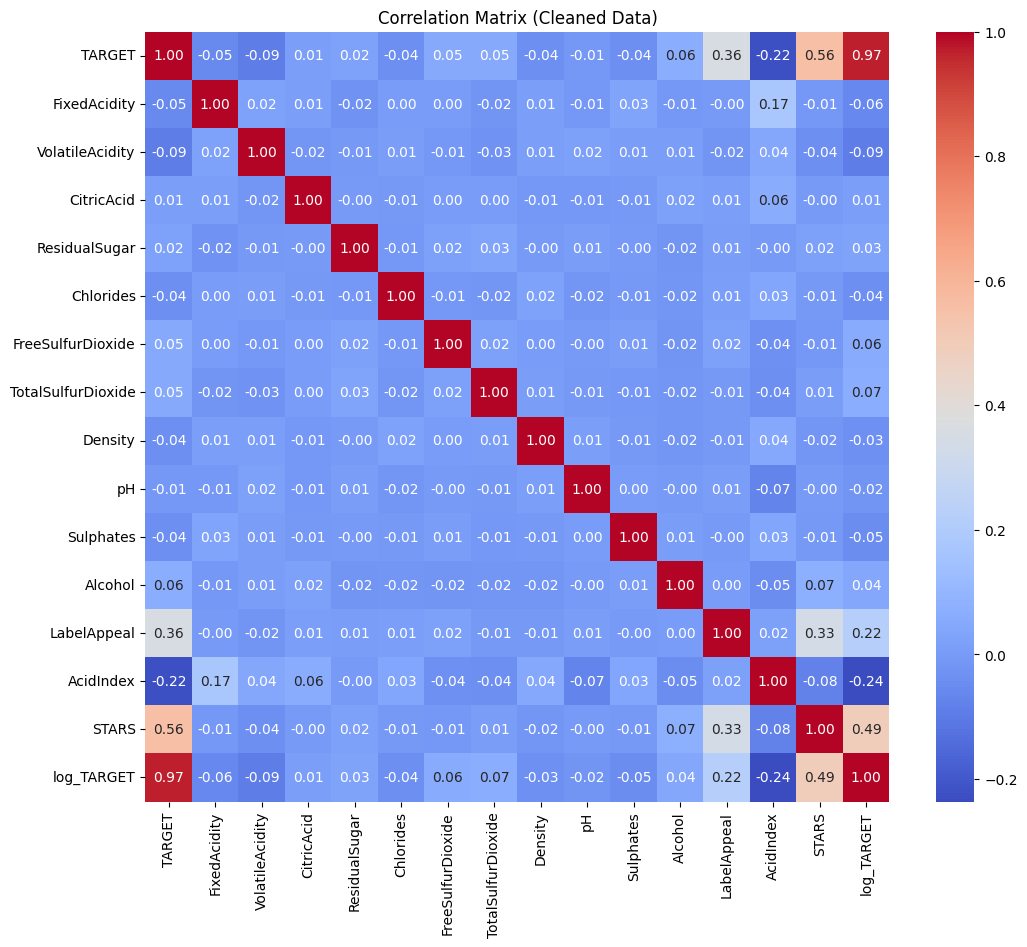

In [69]:
# Correlation Matrix on Cleaned Data
plt.figure(figsize=(12, 10))
sns.heatmap(df[clean_numeric_cols].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix (Cleaned Data)")
plt.show()


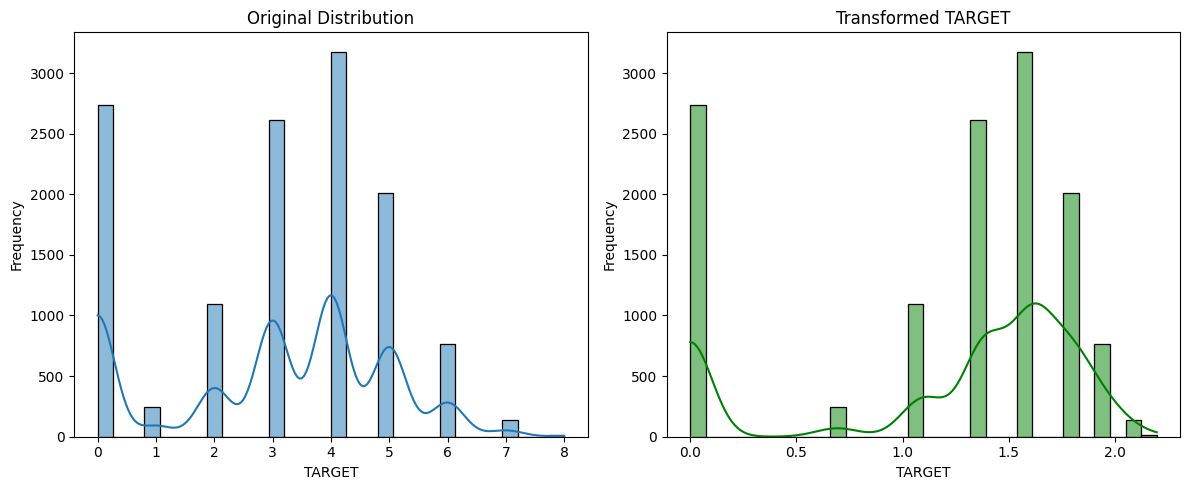

In [70]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['TARGET'], bins=30, kde=True)
plt.xlabel("TARGET")
plt.ylabel("Frequency")
plt.title("Original Distribution")

#log transform data
plt.subplot(1, 2, 2)
sns.histplot(df['log_TARGET'], bins=30, kde=True, color='green')
plt.xlabel("TARGET")
plt.ylabel("Frequency")
plt.title("Transformed TARGET")

plt.tight_layout()
plt.show()


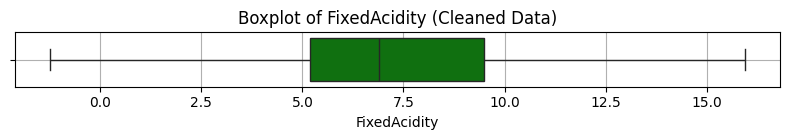

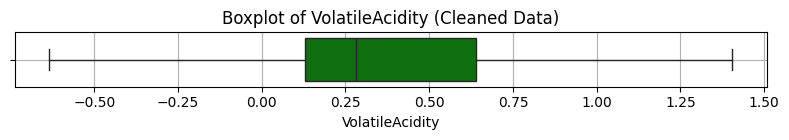

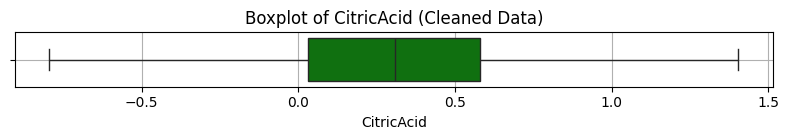

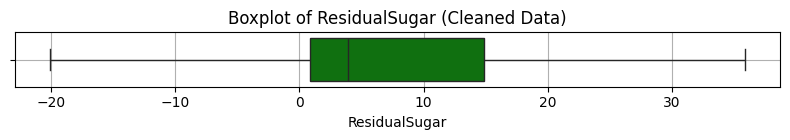

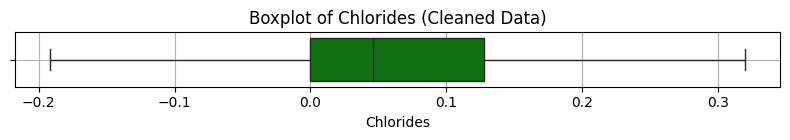

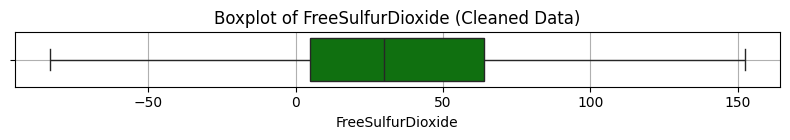

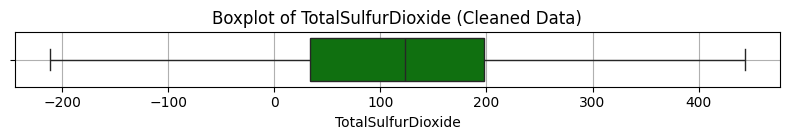

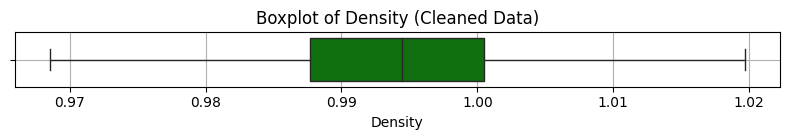

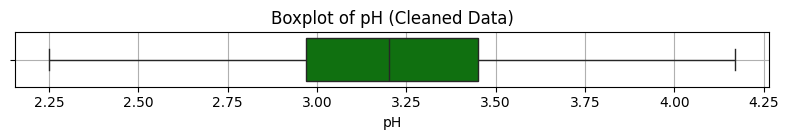

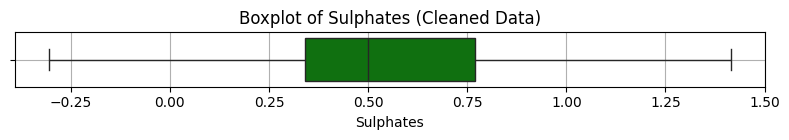

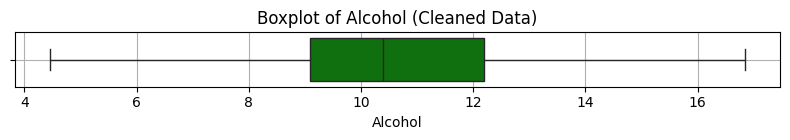

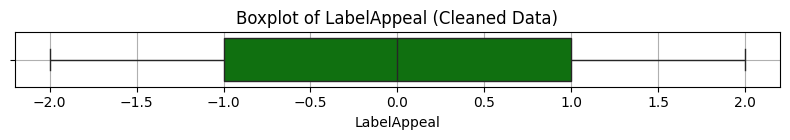

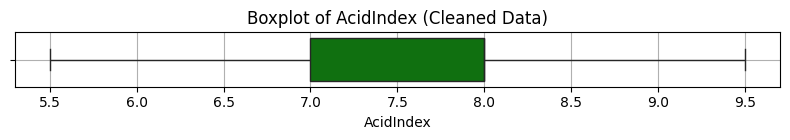

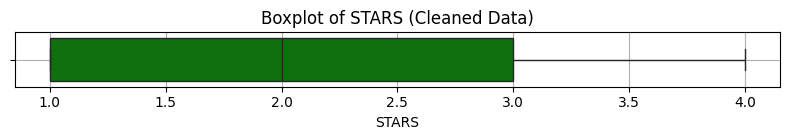

In [71]:
#box plots with cap on outlier
for col in cols_to_cap:
    plt.figure(figsize=(8, 1.5))
    sns.boxplot(x=df[col], color='green')
    plt.title(f"Boxplot of {col} (Cleaned Data)")
    plt.xlabel(col)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


Outliers are now in more reasonable bounds and due to the histograms also being normalized or more bell curve-like, they are are also more suitable for ML type algorithms if we intend to run the data through a ML algorithm.

# Conclusion

Some conclusions:


*   Alcohol and quality shows a positive correlation, where wines with more alcohol receive higher quality ratings
*   Higher volatile acid amounts have negative correlation with their ratings showing they are more likely to receive a lower rating
*   The residual sugar and the quality do not seem to have a correlation







Most of the wines fall between a 2 and 3 rating which means most of the wines fall in the mid-tier for their rating.